In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.api as sm
from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline

# https://rpubs.com/emb90/137525
# https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
# http://chrisalbon.com/python/pandas_time_series_basics.html

In [4]:
data = pd.read_csv('AirPassengers.csv')

In [5]:
data.head()

,y,date
0,112,1949.000000
1,118,1949.083333
2,132,1949.166667
3,129,1949.250000
4,121,1949.333333


In [6]:
data.columns

Index(['y', 'date'], dtype='object')

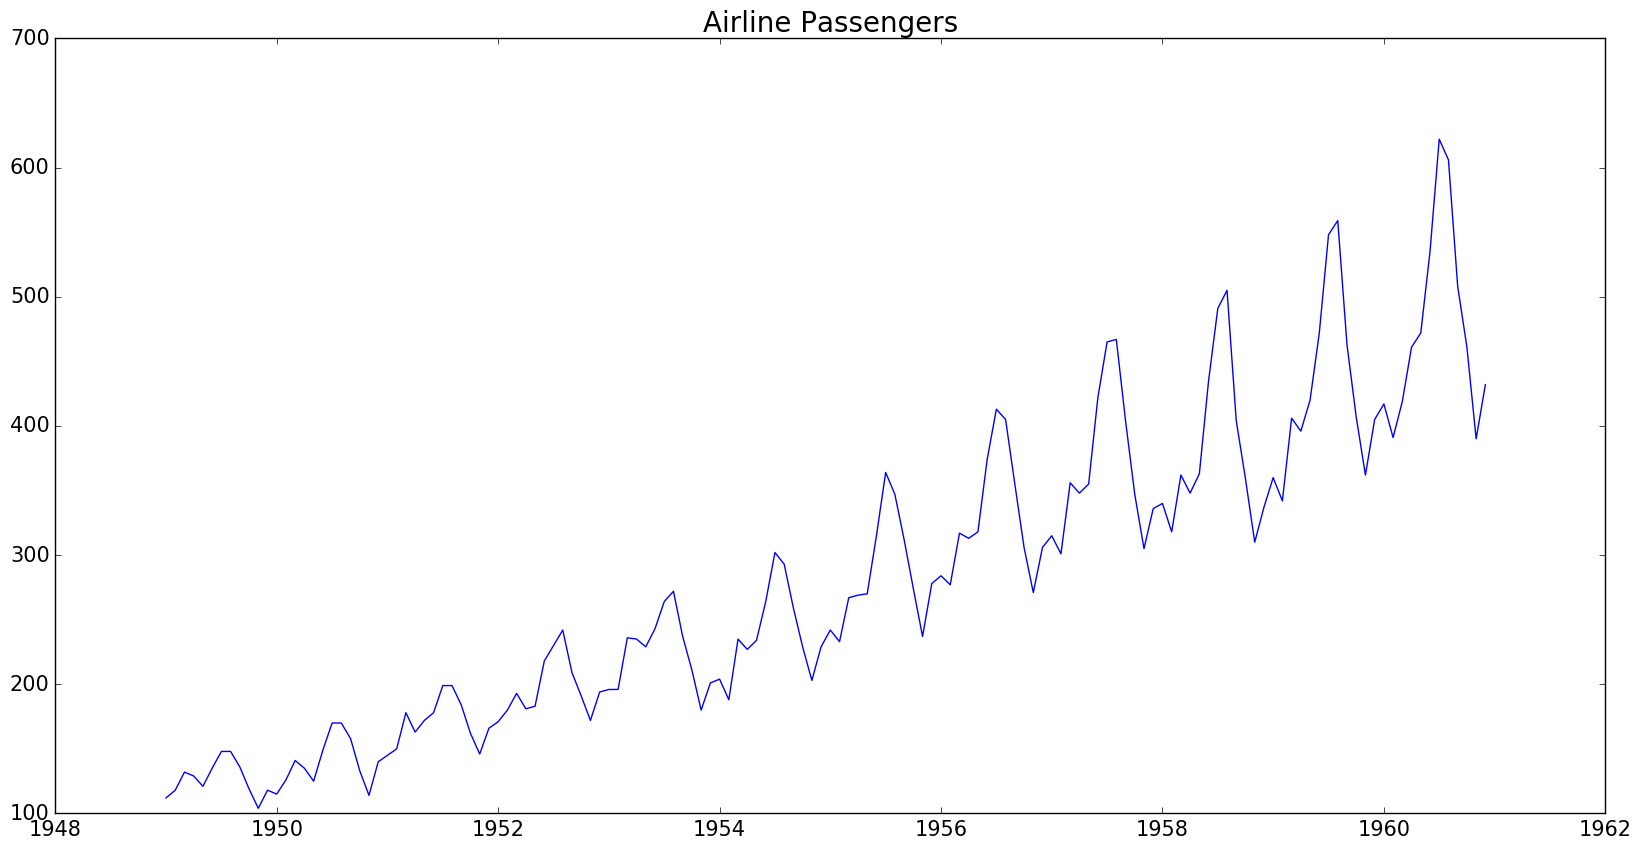

In [7]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(111)

## the data
x1 = data['date']
y1 = data['y']

ax1.plot(x1,y1,color='blue')
ax1.tick_params(labelsize=15)
ax1.set_title("Airline Passengers", fontsize=20)

plt.show()

In [8]:
# The number of passengers travelling on the airline is increasing with time. 
# Trend - A systematic change that does not appear to be periodic
# Seasonal Variation - repeating pattern within each year

### Make DF to TS

In [9]:
#make sure you can read dates as dates
data['month'] = data['date'] - np.fix(data['date'])

In [10]:
#convert decimal to month number
data['month'] = (data['month'] * 12)+1

In [11]:
data['date'] = np.fix(data['date'])

In [12]:
# round the month number, make into string, remove ".0"
data['month'] = data.apply(lambda row: str(round(row['month'], 0)).replace('.0', ''), axis=1)
# add leading zero to single digit month numbers
data['month'] = data.apply(lambda row: '0' + row['month'] if len(row['month'])==1 else row['month'], axis=1)
# add column fulldate - concatonate year and month
data['fulldate'] = data.apply(lambda row: str(round(row['date'], 0)).replace('.0', '') + '-' + row['month'], axis=1)

In [70]:
data.head()

,y
fulldate,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [14]:
#convert fulldate string to date - Pandas http://chrisalbon.com/python/pandas_time_series_basics.html
data['fulldate'] = pd.to_datetime(data['fulldate'])

In [15]:
data.index = data['fulldate']

In [16]:
#remove extra columns
del data['date']
del data['month']
del data['fulldate']

In [17]:
data.head()

,y
fulldate,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


/Users/nmolivo/anaconda/lib/python3.5/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


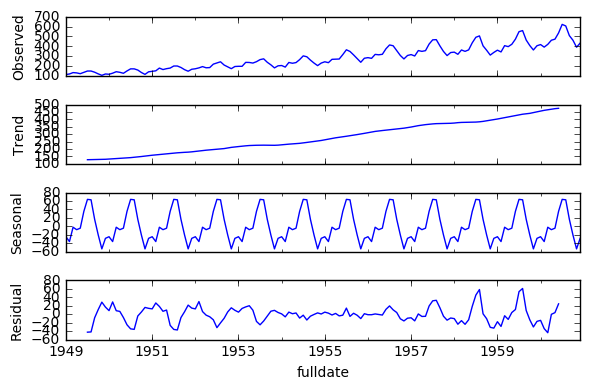

In [18]:
# the decompose function estimates trends and seasonal effects using a moving average method
data.y.interpolate(inplace=True)

res = sm.tsa.seasonal_decompose(data.y)
resplot = res.plot()

In [19]:
dta = sm.datasets.co2.load_pandas().data

In [20]:
#Trend component - trend is linear

In [21]:
# t <- seq(1, 144, 1)
# modelTrend <- lm(formula = AP.decompM$trend ~ t)
# predT <- predict.lm(modelTrend, newdata = data.frame(t))

# plot(AP.decompM$trend[7:138] ~ t[7:138], ylab="T(t)", xlab="t",
#      type="p", pch=20, main = "Trend Component: Modelled vs Observed")
# lines(predT, col="red")

In [22]:
trend = res.trend

In [23]:
trend.head()

fulldate
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
Name: y, dtype: float64

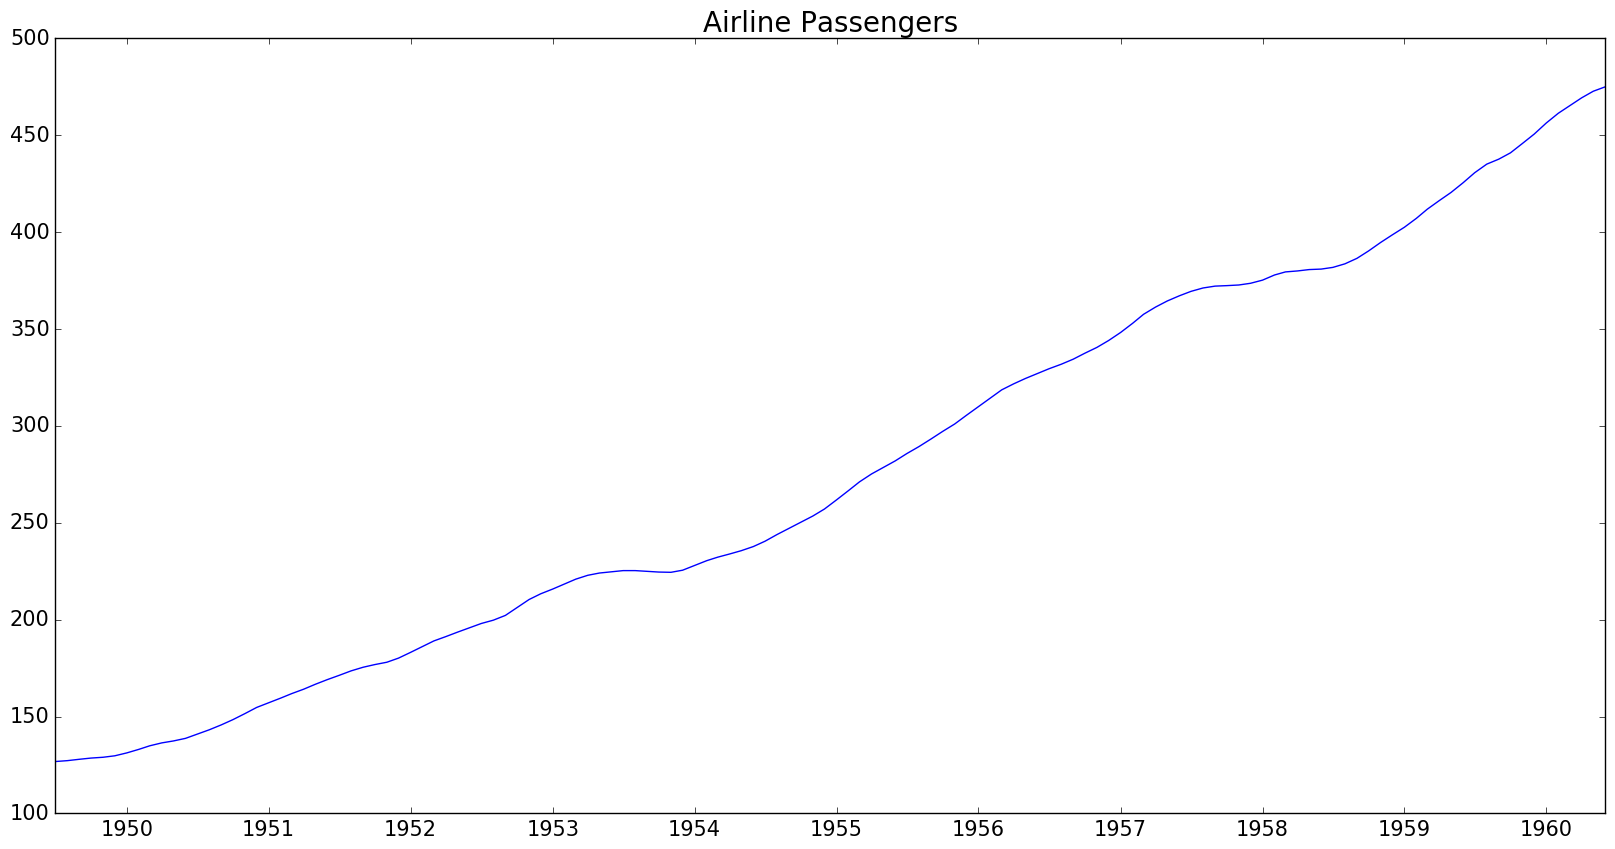

In [24]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(111)

## the data (must be in df form?)
x1 = trend.index
y1 = trend

ax1.plot(x1,y1,color='blue')
ax1.tick_params(labelsize=15)
ax1.set_title("Airline Passengers", fontsize=20)

plt.show()

In [33]:
# remove NaN values from trend, inplace=True means you don't have to reassign it a name 
# because it modifies existing object
trend.dropna(inplace=True)

In [34]:
type(trend)

pandas.core.series.Series

In [59]:
trend_ar = np.array(trend)
trend_df = pd.DataFrame(trend)
trenddate_ar = np.array(trend_df.index.date)

In [63]:
len(trend_ar)

132

In [68]:
length = len(trenddate_ar)

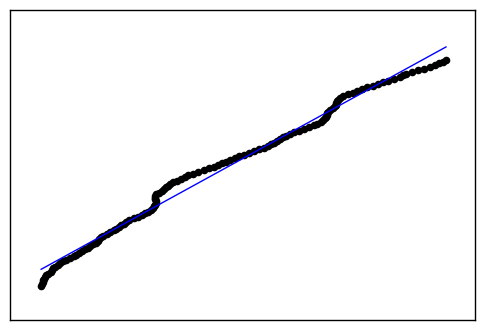

In [86]:
x = trenddate_ar
y = trend_ar

x = trend_ar.reshape(length, 1)
y = list(range(0,132))

regr = linear_model.LinearRegression()
regr.fit(x, y)

# plot it as in the example at http://scikit-learn.org/
plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=1)
plt.xticks(())
plt.yticks(())
plt.show()